Humza Salman
mhs180007

In [74]:
import networkx as nx
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd

This function prints the top five (or `num`) nodes according to the centrality vector `v`, where `v` takes the form: `v[nidx]` is the centrality of the node that is the `nidx`-th element of `G.nodes()`

In [90]:
def get_top_5(G,v, num=5):
    thenodes = list(G.nodes())
    idx_list = [(i,v[i]) for i in range(len(v))]
    idx_list = sorted(idx_list, key = lambda x: x[1], reverse=True)
    ret = []
    for i in range(min(num,len(idx_list))):
        nidx, score = idx_list[i]
        # print('  %i. %s (%1.4f)' % (i+1,thenodes[nidx],score))
        txt = ('%i.  %s   (%1.4f)' % (i+1,thenodes[nidx],score))
        ret.append(txt)
        #print '  %i. %s' % (i+1,G.node_object(idx))
    return ret

In [68]:
def print_top_5(G,v, num=5):
    thenodes = list(G.nodes())
    idx_list = [(i,v[i]) for i in range(len(v))]
    idx_list = sorted(idx_list, key = lambda x: x[1], reverse=True)
    for i in range(min(num,len(idx_list))):
        nidx, score = idx_list[i]
        print('  %i. %s (%1.4f)' % (i+1,thenodes[nidx],score))
        #print '  %i. %s' % (i+1,G.node_object(idx))

This function returns the index of the maximum of the array. If two or more indices have the same max value, the first index is returned.

In [69]:
def index_of_max(v):
    return np.where(v == max(v))[0]

This function accepts a dictionary of nodes with centrality values and returns a centrality vector

In [70]:
def centrality_vector(G,d):
    thenodes = list(G.nodes())
    v = np.zeros((G.number_of_nodes(),))
    for i,u in enumerate(thenodes):
        v[i] = d[u]
    return v

This function provides the index of a node based on its order in `G.nodes()`

In [71]:
def node_index(G,n):
    thenodes = list(G.nodes())
    return thenodes.index(n)

Now we read in the edgelist file that contains the coappearance network we will analyze. We will look at two different networks, corresponding to only the *Lord of the Rings* series and the *Lord of the Rings* series plus the prequel, The *Hobbit*. The `unweighted` boolean, if set to `True` will set all the edge weights to one. Recall that setting all weights to 1 is different (in NetworkX) from having no weights assigned, which could be accomplished instead by: `G = nx.read_edgelist('LoTR_characters.edgelist',data=False)`.

In [72]:
def create_graph(edgelist, unweighted):
    # G = nx.read_weighted_edgelist('LotR_characters.edgelist') # just Lord of the Rings
    #G = nx.read_weighted_edgelist('hobbit_LotR_characters.edgelist') # with the Hobbit
    G = nx.read_weighted_edgelist(edgelist) # just Lord of the Rings
    if unweighted:
        for u,v in G.edges():
            G[u][v]['weight'] = 1
    A = np.array(nx.adjacency_matrix(G).todense().T)
    N = G.number_of_nodes()
    
    return G, A, N

In [123]:
G_lotr_unweighted, A_lotr_unweighted, N_lotr_unweighted = create_graph(edgelist='LotR_characters.edgelist', unweighted=True)
G_lotr_weighted, A_lotr_weighted, N_lotr_weighted = create_graph(edgelist='LotR_characters.edgelist', unweighted=False)
G_lotr_hobbit_weighted, A_lotr_hobbit_weighted, N_lotr_hobbit_weighted = create_graph(edgelist='hobbit_LotR_characters.edgelist', unweighted=False)

C:\Users\Humza\AppData\Local\Temp\ipykernel_8236\251722499.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(G).todense().T)


## Section 7.1 Degree Centrality

In [124]:
print('HIGHLIGHTED QUESTION - print out the top 5 characters with highest centrality in terms of degree')
degree_df = pd.DataFrame()
degree_df['LotR_unweighted'] = get_top_5(G, A_lotr_unweighted.sum(axis=1))
degree_df['LotR_weighted'] = get_top_5(G, A_lotr_weighted.sum(axis=1))
degree_df['LotR+Hobbit_weighted'] = get_top_5(G, A_lotr_hobbit_weighted.sum(axis=1))
degree_df.head()

HIGHLIGHTED QUESTION - print out the top 5 characters with highest centrality in terms of degree


,LotR_unweighted,LotR_weighted,LotR+Hobbit_weighted
0,1. shagrat (153.0000),1. shagrat (762.0000),1. gandalf (901.0000)
1,2. smeagol (144.0000),2. smeagol (661.0000),2. frodo (661.0000)
2,3. frodo (140.0000),3. frodo (632.0000),3. aragorn (632.0000)
3,4. eomer (137.0000),4. eomer (606.0000),4. pippin (606.0000)
4,5. bilbo (125.0000),5. bilbo (484.0000),5. bilbo (602.0000)


## Section 7.2 Eigenvector Centrality

In [125]:
print('HIGHLIGHTED QUESTION - Eigenvector Centrality (by NetworkX):')
eig_cen_nx_df = pd.DataFrame()
eig_cen_nx_df['LotR_unweighted'] = get_top_5(G_lotr_unweighted, list(nx.eigenvector_centrality(G_lotr_unweighted).values()))
eig_cen_nx_df['LotR_weighted'] = get_top_5(G_lotr_weighted, list(nx.eigenvector_centrality(G_lotr_weighted, weight='weight').values()))
eig_cen_nx_df['LotR+Hobbit_weighted'] = get_top_5(G_lotr_hobbit_weighted, list(nx.eigenvector_centrality(G_lotr_hobbit_weighted, weight='weight').values()))
eig_cen_nx_df.head()

HIGHLIGHTED QUESTION - Eigenvector Centrality (by NetworkX):


,LotR_unweighted,LotR_weighted,LotR+Hobbit_weighted
0,1. gandalf (0.1682),1. gandalf (0.3412),1. gandalf (0.3570)
1,2. aragorn (0.1641),2. frodo (0.2920),2. frodo (0.2827)
2,3. frodo (0.1618),3. aragorn (0.2908),3. aragorn (0.2783)
3,4. elrond (0.1541),4. pippin (0.2839),4. pippin (0.2723)
4,5. pippin (0.1533),5. sauron (0.2300),5. bilbo (0.2287)


In [304]:
def eig_cen_la(A):
    k, v = la.eig(A)
    k = np.abs(k)
    v = np.abs(v)
    
    k1_idx = index_of_max(k)

    return v[:,k1_idx]

In [305]:
print('HIGHLIGHTED QUESTION - Eigenvector Centrality (by linear algebra):')
eig_cen_la_df = pd.DataFrame()
eig_cen_la_df['LotR_unweighted'] = get_top_5(G_lotr_unweighted, eig_cen_la(A_lotr_unweighted))
eig_cen_la_df['LotR_weighted'] = get_top_5(G_lotr_weighted, eig_cen_la(A_lotr_weighted))
eig_cen_la_df['LotR+Hobbit_weighted'] = get_top_5(G_lotr_hobbit_weighted, eig_cen_la(A_lotr_hobbit_weighted))
eig_cen_la_df.head()

HIGHLIGHTED QUESTION - Eigenvector Centrality (by linear algebra):


,LotR_unweighted,LotR_weighted,LotR+Hobbit_weighted
0,1. gandalf (0.1682),1. gandalf (0.3412),1. gandalf (0.3570)
1,2. aragorn (0.1641),2. frodo (0.2920),2. frodo (0.2827)
2,3. frodo (0.1618),3. aragorn (0.2908),3. aragorn (0.2783)
3,4. elrond (0.1541),4. pippin (0.2839),4. pippin (0.2723)
4,5. pippin (0.1533),5. sauron (0.2300),5. bilbo (0.2287)


In [320]:
noi = 'arwen'
noi_idx = node_index(G_lotr_unweighted,noi)
print('HIGHLIGHTED QUESTION - Confirm that this is the case for a node index of your choosing by printing these two quantities: the centrality of that character and the (weighted) sum of the centralities of that character\'s neighbors (normalized by the largest eigenvalue).')
print('HIGHLIGHTED QUESTION - Confirming that eigenvector centrality is a steady-state of sorts for node %s:' % noi)
# compare the eigenvector centrality of arwen to the sum of the centralities of its neighbors (divided by the largest eigenvalue)
print(f'{noi}\'s eigenvector centrality value: {float(eig_cen_la(A_lotr_unweighted)[noi_idx])}')

neighbors_of_noi = list(G_lotr_unweighted.neighbors(noi))
weighted_sum = 0
k, v = la.eig(A_lotr_unweighted)
k = np.real(k)
v = np.real(v)
k1_idx = index_of_max(k)
lambda1 = k[k1_idx]

for n in neighbors_of_noi:
    weighted_sum += eig_cen_la(A_lotr_unweighted)[node_index(G_lotr_unweighted, n)]
    
print(f'weighted sum of eigenvector centrality values of {noi}\'s neighbors: {float(weighted_sum / lambda1)}')

HIGHLIGHTED QUESTION - Confirm that this is the case for a node index of your choosing by printing these two quantities: the centrality of that character and the (weighted) sum of the centralities of that character's neighbors (normalized by the largest eigenvalue).
HIGHLIGHTED QUESTION - Confirming that eigenvector centrality is a steady-state of sorts for node arwen:
arwen's eigenvector centrality value: 0.11265370336918339
weighted sum of eigenvector centrality values of arwen's neighbors: 0.11265370336918322


The following section should run and produce a plot that you need to interpret.

Showing the convergece of eigenvector centrality...


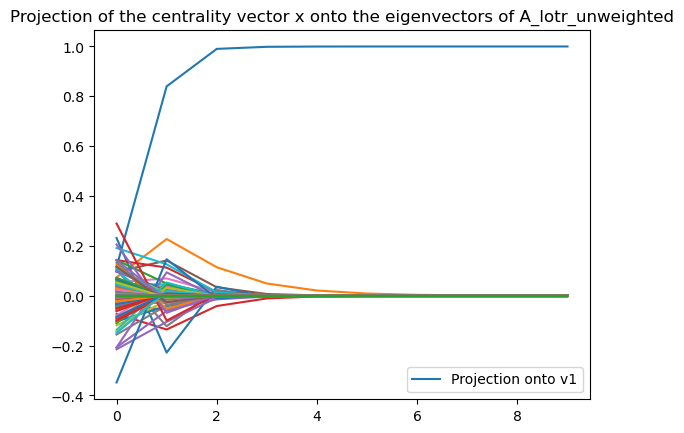

In [131]:
print('Showing the convergece of eigenvector centrality...')
num_steps = 10
x = np.zeros((N_lotr_unweighted,1)) # initial centrality vector
x[76] = 1
cs = np.zeros((N_lotr_unweighted,num_steps))
for i in range(num_steps):
    x = x/la.norm(x) # at each step we need to normalize the centrality vector
    for j in range(G_lotr_unweighted.number_of_nodes()):
        cs[j,i] = np.real(np.dot( x.T , v[:,j] ))[0] # project x onto each of the eigenvectors
    x = np.dot(A_lotr_unweighted,x) # "pass" the centrality one step forward

plt.figure() # this creates a figure to plot in
for i in range(G_lotr_unweighted.number_of_nodes()): # for each eigenvector plot the projection of x onto it over the steps
    if i == k1_idx:
        plt.plot(range(num_steps),cs[i,:],label='Projection onto v1') # only label the eigenvector v1
    else:
        plt.plot(range(num_steps),cs[i,:])
#plt.ylim([-0.2,1.1]) # this sets the limits for the y axis
plt.legend(loc='best') # this attaches a legend
plt.title('Projection of the centrality vector x onto the eigenvectors of A_lotr_unweighted') # this adds a title
plt.show() # this makes the figure appear

In [321]:
print('HIGHLIGHTED QUESTION - Turn in this plot. In your own words, make a short statement that describes what is going.')
print('We find that all projections of centrality vector x onto eigenvectors of A except for v1 converge to 0 as t approaches infinity. This tells us that the centrality x ~ v1 (eigenvector corresponding to largest eigenvalue of A). In other words, because c1 and lambda1 are constants, the centrality vector x is proportional to v1 because lambda1 is the largest eigenvalue and v1 is the eigenvector that corresponds to lambda1.')

HIGHLIGHTED QUESTION - Turn in this plot. In your own words, make a short statement that describes what is going.
We find that all projections of centrality vector x onto eigenvectors of A except for v1 converge to 0 as t approaches infinity. This tells us that the centrality x ~ v1 (eigenvector corresponding to largest eigenvalue of A). In other words, because c1 and lambda1 are constants, the centrality vector x is proportional to v1 because lambda1 is the largest eigenvalue and v1 is the eigenvector that corresponds to lambda1.


## Section 7.3 Katz Centrality

In [199]:
def calc_lambda1 (A):
    k, v = la.eig(A)
    k = np.real(k)
    v = np.real(v)
    k1_idx = index_of_max(k)
    lambda1 = k[k1_idx]
    return lambda1

In [202]:
def katz_cen_la(G, A, N, alpha):
    beta = 1
    x = la.inv(np.eye(N) - alpha * A) @ (beta * np.ones((N,1)))        
    return x

In [281]:
print('Katz Centrality LA:')
print('HIGHLIGHTED QUESTION - Try a few values for α and print out the top 5 central characters in each case.')
katz_cen_la_df = pd.DataFrame()
# x = katz_cen_la(G_lotr_unweighted, A_lotr_unweighted, N_lotr_unweighted, lambda1)
# print(get_top_5(G_lotr_unweighted, x[0]))
# print(x)
katz_cen_la_df = pd.DataFrame(columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])

lambda1_lotr_unweighted = calc_lambda1(A_lotr_unweighted)
lambda1_lotr_weighted = calc_lambda1(A_lotr_weighted)
lambda1_lotr_hobbit_weighted = calc_lambda1(A_lotr_hobbit_weighted)

alpha_lotr_unweighted = np.linspace(0, 0.9*(1/lambda1_lotr_unweighted), num = 5)
alpha_lotr_weighted = np.linspace(0, 0.9*(1/lambda1_lotr_weighted), num = 5)
alpha_lotr_hobbit_weighted = np.linspace(0, 0.9*(1/lambda1_lotr_hobbit_weighted), num = 5)

for a1, a2, a3 in zip(alpha_lotr_unweighted, alpha_lotr_weighted, alpha_lotr_hobbit_weighted):
    x1 = get_top_5(G_lotr_unweighted, katz_cen_la(G_lotr_unweighted, A_lotr_unweighted, N_lotr_unweighted, a1))
    x2 = get_top_5(G_lotr_weighted, katz_cen_la(G_lotr_weighted, A_lotr_weighted, N_lotr_weighted, a2))
    x3 = get_top_5(G_lotr_hobbit_weighted, katz_cen_la(G_lotr_hobbit_weighted, A_lotr_hobbit_weighted, N_lotr_hobbit_weighted, a3))
    
    for x1i, x2i, x3i in zip(x1, x2, x3):
        temp_df = pd.DataFrame([[str(a1), x1i, str(a2), x2i, str(a3), x3i]], columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])
        katz_cen_la_df = pd.concat([katz_cen_la_df, temp_df])
        
    katz_cen_la_df = pd.concat([katz_cen_la_df, pd.DataFrame([['---', '---', '---', '---', '---', '---']], columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])])
katz_cen_la_df.head(30)

Katz Centrality LA:
HIGHLIGHTED QUESTION - Try a few values for α and print out the top 5 central characters in each case.


,a1,LotR_unweighted,a2,LotR_weighted,a3,LotR+Hobbit_weighted
0,[0.],1. amroth (1.0000),[0.],1. amroth (1.0000),[0.],1. anborn (1.0000)
0,[0.],2. aragorn (1.0000),[0.],2. aragorn (1.0000),[0.],2. frodo (1.0000)
0,[0.],3. arathorn (1.0000),[0.],3. arathorn (1.0000),[0.],3. faramir (1.0000)
0,[0.],4. arwen (1.0000),[0.],4. arwen (1.0000),[0.],4. gandalf (1.0000)
0,[0.],5. beregond (1.0000),[0.],5. beregond (1.0000),[0.],5. samwise (1.0000)
0,---,---,---,---,---,---
0,[0.00356308],1. gandalf (1.6614),[0.00075133],1. gandalf (1.7341),[0.00072498],1. gandalf (1.8306)
0,[0.00356308],2. frodo (1.6254),[0.00075133],2. frodo (1.6351),[0.00072498],2. frodo (1.6188)
0,[0.00356308],3. aragorn (1.6124),[0.00075133],3. aragorn (1.6129),[0.00072498],3. aragorn (1.5952)
0,[0.00356308],4. pippin (1.5952),[0.00075133],4. pippin (1.5902),[0.00072498],4. pippin (1.5736)


In [283]:
print('Katz Centrality networkx:')
katz_cen_nx_df = pd.DataFrame()
# x = katz_cen_la(G_lotr_unweighted, A_lotr_unweighted, N_lotr_unweighted, lambda1)
# print(get_top_5(G_lotr_unweighted, x[0]))
# print(x)
katz_cen_nx_df = pd.DataFrame(columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])

lambda1_lotr_unweighted = calc_lambda1(A_lotr_unweighted)
lambda1_lotr_weighted = calc_lambda1(A_lotr_weighted)
lambda1_lotr_hobbit_weighted = calc_lambda1(A_lotr_hobbit_weighted)

alpha_lotr_unweighted = np.linspace(0, 0.9*(1/lambda1_lotr_unweighted), num = 5)
alpha_lotr_weighted = np.linspace(0, 0.9*(1/lambda1_lotr_weighted), num = 5)
alpha_lotr_hobbit_weighted = np.linspace(0, 0.9*(1/lambda1_lotr_hobbit_weighted), num = 5)

for a1, a2, a3 in zip(alpha_lotr_unweighted, alpha_lotr_weighted, alpha_lotr_hobbit_weighted):
    x1 = get_top_5(G_lotr_unweighted, list(nx.katz_centrality(G_lotr_unweighted, alpha=a1, beta=1).values()))
    x2 = get_top_5(G_lotr_weighted, list(nx.katz_centrality(G_lotr_weighted, alpha=a2, beta=1).values()))
    x3 = get_top_5(G_lotr_hobbit_weighted, list(nx.katz_centrality(G_lotr_hobbit_weighted, alpha=a3, beta=1).values()))
    
    for x1i, x2i, x3i in zip(x1, x2, x3):
        temp_df = pd.DataFrame([[str(a1), x1i, str(a2), x2i, str(a3), x3i]], columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])
        katz_cen_nx_df = pd.concat([katz_cen_nx_df, temp_df])
        
    katz_cen_nx_df = pd.concat([katz_cen_la_df, pd.DataFrame([['---', '---', '---', '---', '---', '---']], columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])])
katz_cen_nx_df.head(30)

Katz Centrality networkx:


,a1,LotR_unweighted,a2,LotR_weighted,a3,LotR+Hobbit_weighted
0,[0.],1. amroth (1.0000),[0.],1. amroth (1.0000),[0.],1. anborn (1.0000)
0,[0.],2. aragorn (1.0000),[0.],2. aragorn (1.0000),[0.],2. frodo (1.0000)
0,[0.],3. arathorn (1.0000),[0.],3. arathorn (1.0000),[0.],3. faramir (1.0000)
0,[0.],4. arwen (1.0000),[0.],4. arwen (1.0000),[0.],4. gandalf (1.0000)
0,[0.],5. beregond (1.0000),[0.],5. beregond (1.0000),[0.],5. samwise (1.0000)
0,---,---,---,---,---,---
0,[0.00356308],1. gandalf (1.6614),[0.00075133],1. gandalf (1.7341),[0.00072498],1. gandalf (1.8306)
0,[0.00356308],2. frodo (1.6254),[0.00075133],2. frodo (1.6351),[0.00072498],2. frodo (1.6188)
0,[0.00356308],3. aragorn (1.6124),[0.00075133],3. aragorn (1.6129),[0.00072498],3. aragorn (1.5952)
0,[0.00356308],4. pippin (1.5952),[0.00075133],4. pippin (1.5902),[0.00072498],4. pippin (1.5736)


## Section 7.4 PageRank Centrality

In [318]:
Aa = [[0, 1, 1], [1, 0, 0], [0, 0, 1]]
Dd = np.diag(np.sum(Aa, axis=1))
print(Aa)
print(la.inv(Dd))
print(Aa @ la.inv(Dd))

[[0, 1, 1], [1, 0, 0], [0, 0, 1]]
[[0.5 0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]]
[[0.  1.  1. ]
 [0.5 0.  0. ]
 [0.  0.  1. ]]


In [288]:
def pagerank_cen_la(G, A, N, alpha):
    beta=1
    D = np.diag(np.sum(A, axis=1))
    x = la.inv(np.eye(N) - ((alpha * A) @ la.inv(D))) @ (beta * np.ones((N,1)))
    return x

In [289]:
print('PageRank Centrality LA:')
print('HIGHLIGHTED QUESTION -  Calculate PageRank centrality (by linear algebra) for The Lord of the Rings network and print the top 5 characters with highest centrality.')

pagerank_cen_la_df = pd.DataFrame(columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])


alpha_lotr_unweighted = np.linspace(0, 0.9*(1), num = 5)
alpha_lotr_weighted = np.linspace(0, 0.9*(1), num = 5)
alpha_lotr_hobbit_weighted = np.linspace(0, 0.9*(1), num = 5)

for a1, a2, a3 in zip(alpha_lotr_unweighted, alpha_lotr_weighted, alpha_lotr_hobbit_weighted):
    x1 = get_top_5(G_lotr_unweighted, pagerank_cen_la(G_lotr_unweighted, A_lotr_unweighted, N_lotr_unweighted, a1))
    x2 = get_top_5(G_lotr_weighted, pagerank_cen_la(G_lotr_weighted, A_lotr_weighted, N_lotr_weighted, a2))
    x3 = get_top_5(G_lotr_hobbit_weighted, pagerank_cen_la(G_lotr_hobbit_weighted, A_lotr_hobbit_weighted, N_lotr_hobbit_weighted, a3))
    
    for x1i, x2i, x3i in zip(x1, x2, x3):
        temp_df = pd.DataFrame([[str(a1), x1i, str(a2), x2i, str(a3), x3i]], columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])
        pagerank_cen_la_df = pd.concat([pagerank_cen_la_df, temp_df])
        
    pagerank_cen_la_df = pd.concat([pagerank_cen_la_df, pd.DataFrame([['---', '---', '---', '---', '---', '---']], columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])])
pagerank_cen_la_df.head(30)

PageRank Centrality LA:
HIGHLIGHTED QUESTION -  Calculate PageRank centrality (by linear algebra) for The Lord of the Rings network and print the top 5 characters with highest centrality.


,a1,LotR_unweighted,a2,LotR_weighted,a3,LotR+Hobbit_weighted
0,0.0,1. amroth (1.0000),0.0,1. amroth (1.0000),0.0,1. anborn (1.0000)
0,0.0,2. aragorn (1.0000),0.0,2. aragorn (1.0000),0.0,2. frodo (1.0000)
0,0.0,3. arathorn (1.0000),0.0,3. arathorn (1.0000),0.0,3. faramir (1.0000)
0,0.0,4. arwen (1.0000),0.0,4. arwen (1.0000),0.0,4. gandalf (1.0000)
0,0.0,5. beregond (1.0000),0.0,5. beregond (1.0000),0.0,5. samwise (1.0000)
0,---,---,---,---,---,---
0,0.225,1. gandalf (2.4502),0.225,1. gandalf (3.2611),0.225,1. gandalf (3.5224)
0,0.225,2. frodo (2.3676),0.225,2. frodo (3.1394),0.225,2. frodo (3.0161)
0,0.225,3. pippin (2.2534),0.225,3. pippin (2.8401),0.225,3. bilbo (2.7674)
0,0.225,4. aragorn (2.1374),0.225,4. aragorn (2.6912),0.225,4. pippin (2.7361)


In [290]:
print('PageRank Centrality networkx:')

pagerank_cen_la_df = pd.DataFrame(columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])


alpha_lotr_unweighted = np.linspace(0, 0.9*(1), num = 5)
alpha_lotr_weighted = np.linspace(0, 0.9*(1), num = 5)
alpha_lotr_hobbit_weighted = np.linspace(0, 0.9*(1), num = 5)

for a1, a2, a3 in zip(alpha_lotr_unweighted, alpha_lotr_weighted, alpha_lotr_hobbit_weighted):
    x1 = get_top_5(G_lotr_unweighted, list(nx.pagerank(G_lotr_unweighted, alpha=a1).values()))
    x2 = get_top_5(G_lotr_weighted, list(nx.pagerank(G_lotr_weighted, alpha=a2).values()))
    x3 = get_top_5(G_lotr_hobbit_weighted, list(nx.pagerank(G_lotr_hobbit_weighted, alpha=a3).values()))
    
    for x1i, x2i, x3i in zip(x1, x2, x3):
        temp_df = pd.DataFrame([[str(a1), x1i, str(a2), x2i, str(a3), x3i]], columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])
        pagerank_cen_la_df = pd.concat([pagerank_cen_la_df, temp_df])
        
    pagerank_cen_la_df = pd.concat([pagerank_cen_la_df, pd.DataFrame([['---', '---', '---', '---', '---', '---']], columns=['a1', 'LotR_unweighted', 'a2', 'LotR_weighted', 'a3', 'LotR+Hobbit_weighted'])])
pagerank_cen_la_df.head(30)

PageRank Centrality networkx:


,a1,LotR_unweighted,a2,LotR_weighted,a3,LotR+Hobbit_weighted
0,0.0,1. amroth (0.0061),0.0,1. amroth (0.0061),0.0,1. anborn (0.0058)
0,0.0,2. aragorn (0.0061),0.0,2. aragorn (0.0061),0.0,2. frodo (0.0058)
0,0.0,3. arathorn (0.0061),0.0,3. arathorn (0.0061),0.0,3. faramir (0.0058)
0,0.0,4. arwen (0.0061),0.0,4. arwen (0.0061),0.0,4. gandalf (0.0058)
0,0.0,5. beregond (0.0061),0.0,5. beregond (0.0061),0.0,5. samwise (0.0058)
0,---,---,---,---,---,---
0,0.225,1. gandalf (0.0116),0.225,1. gandalf (0.0155),0.225,1. gandalf (0.0158)
0,0.225,2. frodo (0.0113),0.225,2. frodo (0.0149),0.225,2. frodo (0.0135)
0,0.225,3. pippin (0.0107),0.225,3. pippin (0.0135),0.225,3. bilbo (0.0124)
0,0.225,4. aragorn (0.0102),0.225,4. aragorn (0.0128),0.225,4. pippin (0.0123)


In [117]:
print('HIGHLIGHTED QUESTION -  For a connected undirected graph, show that the vector v1=(k1,k2,…,kn), where ki is the degree of node i, is an eigenvector of AD^−1 and using this show why α is upper bounded by 1.')

HIGHLIGHTED QUESTION -  For a connected undirected graph, show that the vector v1=(k1,k2,…,kn), where ki is the degree of node i, is an eigenvector of AD^−1 and using this show why α is upper bounded by 1.


![alt text](pagerank_proof.jpg)

## Section 7.5 Hubs & Authorities

In [46]:
print('HIGHLIGHTED QUESTION -  Now derive the relationship between the corresponding eigenvectors for hubs and authorities – i.e., express the hub eigenvector in terms of the authorities eigenvector.')

HIGHLIGHTED QUESTION -  Now derive the relationship between the corresponding eigenvectors for hubs and authorities – i.e., express the hub eigenvector in terms of the authorities eigenvector.


![alt text](hub_authority_proof.jpg)

## Section 7.6 Closeness Centrality

## Section 7.7 Betweenness Centrality

In [291]:
print('Betweenness Centrality')
print('HIGHLIGHTED QUESTION - Using this function print the top 5 characters with highest betweenness centrality.')
bet_cen_nx_df = pd.DataFrame()
bet_cen_nx_df['LotR_unweighted'] = get_top_5(G_lotr_unweighted, list(nx.betweenness_centrality(G_lotr_unweighted).values()))
bet_cen_nx_df['LotR_weighted'] = get_top_5(G_lotr_weighted, list(nx.betweenness_centrality(G_lotr_weighted, weight='weight').values()))
bet_cen_nx_df['LotR+Hobbit_weighted'] = get_top_5(G_lotr_hobbit_weighted, list(nx.betweenness_centrality(G_lotr_hobbit_weighted, weight='weight').values()))
bet_cen_nx_df.head()

Betweenness Centrality
HIGHLIGHTED QUESTION - Using this function print the top 5 characters with highest betweenness centrality.


,LotR_unweighted,LotR_weighted,LotR+Hobbit_weighted
0,1. gandalf (0.0797),1. gandalf (0.0437),1. gandalf (0.0498)
1,2. frodo (0.0675),2. pippin (0.0366),2. pippin (0.0370)
2,3. pippin (0.0613),3. aragorn (0.0345),3. aragorn (0.0339)
3,4. aragorn (0.0486),4. frodo (0.0289),4. frodo (0.0296)
4,5. bilbo (0.0393),5. bilbo (0.0270),5. bilbo (0.0292)


## Weighted Analysis

In [313]:
print('HIGHLIGHTED QUESTION - comment on the changes that you see due to including the weights in the analysis. In particular, offer explanations for why some of the rankings change and some do not (Comparing lotr_unweighted to lotr_weighted)') 
print()
print('Degree Centrality Changes:')
print('We find that the degree rankings stay the same, although the weight could have influenced the rankings if certain connections were assigned more significance. Since we calculate degree centrality using the adjacency matrix (which is influenced by weight) the top 5 ranking could have changed, but did not since the weighted graph had edges that did not blow up the signifiance of a connection.')
print()
print('Eigenvector Centrality Changes:')
print('Since we use our adjacency matrix to calculate eigenvector centralities, we find that there are changes made in the key players for the lotr_unweighted and lotr_weighted version. Noticably, sauron is shown to be more of a key player than elrond (kicking elrond out of the top 5). We find that gandalf is the most significant character as his ranking does not change at all. Rankings for aragorn, frodo, and pippin shift slightly due to the weight of their connections (frodo having more weight than aragorn makes him more important). Pippin also takes spot 4.')
print()
print('Katz Centrality Changes:')
print('For Katz centrality we find that gandalf, frodo, aragorn, and pippin are in the top 4 spots consecutively. A noticeable change occurs for higher values of alpha in lotr_unweighted where aragorn is more significant than frodo. However, we see that the fifth spot has elrond in lotr_unweighted and sauron in lotr_weighted. This can be explained due to the added weights making sauron more significant compared to elrond.')
print()
print('PageRank Centrality Changes:')
print('PageRank is similar to Katz, but normalizes by the out degree. We find that for higher values of alpha, the number 3, 4, and 5 spots change. This is because alpha is "blowing up" how certain nodes with the same number of connections may have less weight in their connections being made to them, so they have a higher centrality.')
print()
print('Betweenness Centrality Changes:')
print('We find that the top 5 characters remain the same, but their ordering changes slightly. Pippin and Aragorn take the 2 and 3 spots in lotr_weighted with frodo taking the 4 spot. This likely happens since the weights associated with the connections alter the shortest path for some nodes, which would mean that pippin is closet to being a part of the shortest path for a certain character knowing another character because the weight connections associated with pippin are overall lower. This same line of reasoning applies to aragorn, but for frodo we can see that the weight connections have decreased his betweenness since his rank fell.')

HIGHLIGHTED QUESTION - comment on the changes that you see due to including the weights in the analysis. In particular, offer explanations for why some of the rankings change and some do not (Comparing lotr_unweighted to lotr_weighted)

Degree Centrality Changes:
We find that the degree rankings stay the same, although the weight could have influenced the rankings if certain connections were assigned more significance. Since we calculate degree centrality using the adjacency matrix (which is influenced by weight) the top 5 ranking could have changed, but did not since the weighted graph had edges that did not blow up the signifiance of a connection.

Eigenvector Centrality Changes:
Since we use our adjacency matrix to calculate eigenvector centralities, we find that there are changes made in the key players for the lotr_unweighted and lotr_weighted version. Noticably, sauron is shown to be more of a key player than elrond (kicking elrond out of the top 5). We find that gandalf is the m

## A Sequel

In [314]:
print('HIGHLIGHTED QUESTION - Do some of the changes make sense based on what you know about The Hobbit (Comparing lotr_weighted to lotr_hobbit_weighted)')
print()
print('Degree Centrality Changes:')
print('It makes sense that gandalf, frodo, aragorn, pippin, and bilbo are ranked higher up in the degree network since they are referenced in both books as either main or supporting characters')
print()
print('Eigenvector Centrality Changes:')
print('We find that the only change occurs with bilbo taking the #5 spot in lotr_hobbit_weighted and seeing how bilbo is a main character in the hobbit and a suporting character in the lotr it makes sense he is ranked highly.')
print()
print('Katz Centrality Changes:')
print('Again, we notice a change in the #5 spot from sauron to bilo when looking at lotr_hobbit_weighted katz centrality rankings. This happens because of the introduction of new connections that were previously not made.')
print()
print('PageRank Centrality Changes:')
print('In lotr_hobbit_weighted we find that elrond is no longer in the top 5 characters but instead has been replaced by bilbo. This is due to the connections bilbo creates to other characters being the main character in the hobbit, so this makes sense.')
print()
print('Betweenness Centrality Changes:')
print('We see no change from lotr_weighted to lotr_hobbit_weighted in the betweenness centrality. This implies that all characters shown are central to the story and can be used to connect a multitude of other characters in the shortest path.')

HIGHLIGHTED QUESTION - Do some of the changes make sense based on what you know about The Hobbit (Comparing lotr_weighted to lotr_hobbit_weighted)

Degree Centrality Changes:
It makes sense that gandalf, frodo, aragorn, pippin, and bilbo are ranked higher up in the degree network since they are referenced in both books as either main or supporting characters

Eigenvector Centrality Changes:
We find that the only change occurs with bilbo taking the #5 spot in lotr_hobbit_weighted and seeing how bilbo is a main character in the hobbit and a suporting character in the lotr it makes sense he is ranked highly.

Katz Centrality Changes:
Again, we notice a change in the #5 spot from sauron to bilo when looking at lotr_hobbit_weighted katz centrality rankings. This happens because of the introduction of new connections that were previously not made.

PageRank Centrality Changes:
In lotr_hobbit_weighted we find that elrond is no longer in the top 5 characters but instead has been replaced by bi